<a href="https://colab.research.google.com/github/GitBerg/Machine_Learning_Study/blob/master/03-Aprendizagem%20por%20%C3%A1rvore%20de%20decis%C3%A3o/Machine_Learning_%C3%81rvores_De_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#**Árvores De Decisão**

In [3]:
from sklearn.tree import DecisionTreeClassifier

#**Base Risco de Crédito**

In [4]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risc_credit, y_risc_credit = pickle.load(f)

In [5]:
X_risc_credit

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [6]:
y_risc_credit

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [7]:
arvore_risc_credit = DecisionTreeClassifier(criterion="entropy")
arvore_risc_credit.fit(X_risc_credit, y_risc_credit)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
arvore_risc_credit.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [15]:
arvore_risc_credit.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

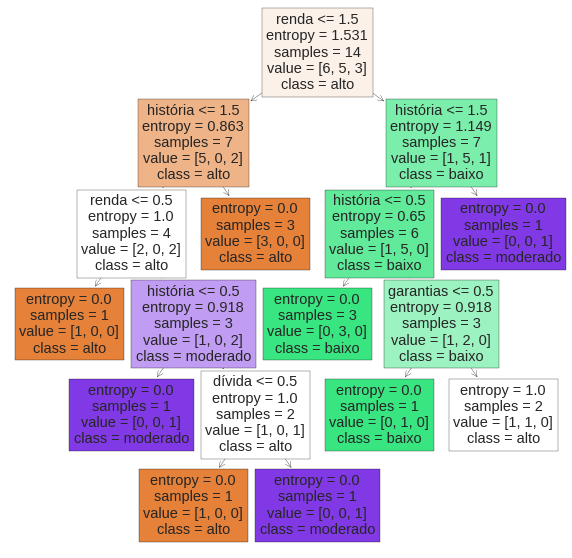

In [33]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risc_credit, feature_names = previsores, class_names= arvore_risc_credit.classes_, filled=True);

In [21]:
previsoes = arvore_risc_credit.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

#**Base Credit Data**

In [22]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento,X_credit_teste, y_credit_teste = pickle.load(f)

In [23]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [24]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [25]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
previsoes = arvore_credit.predict(X_credit_teste)

In [27]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [28]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

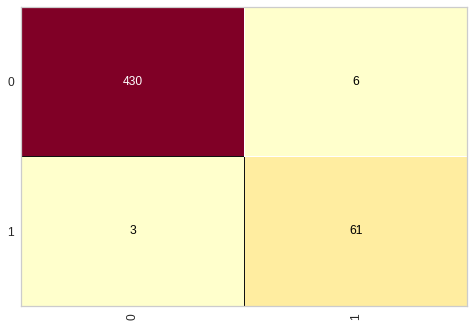

In [31]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [32]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



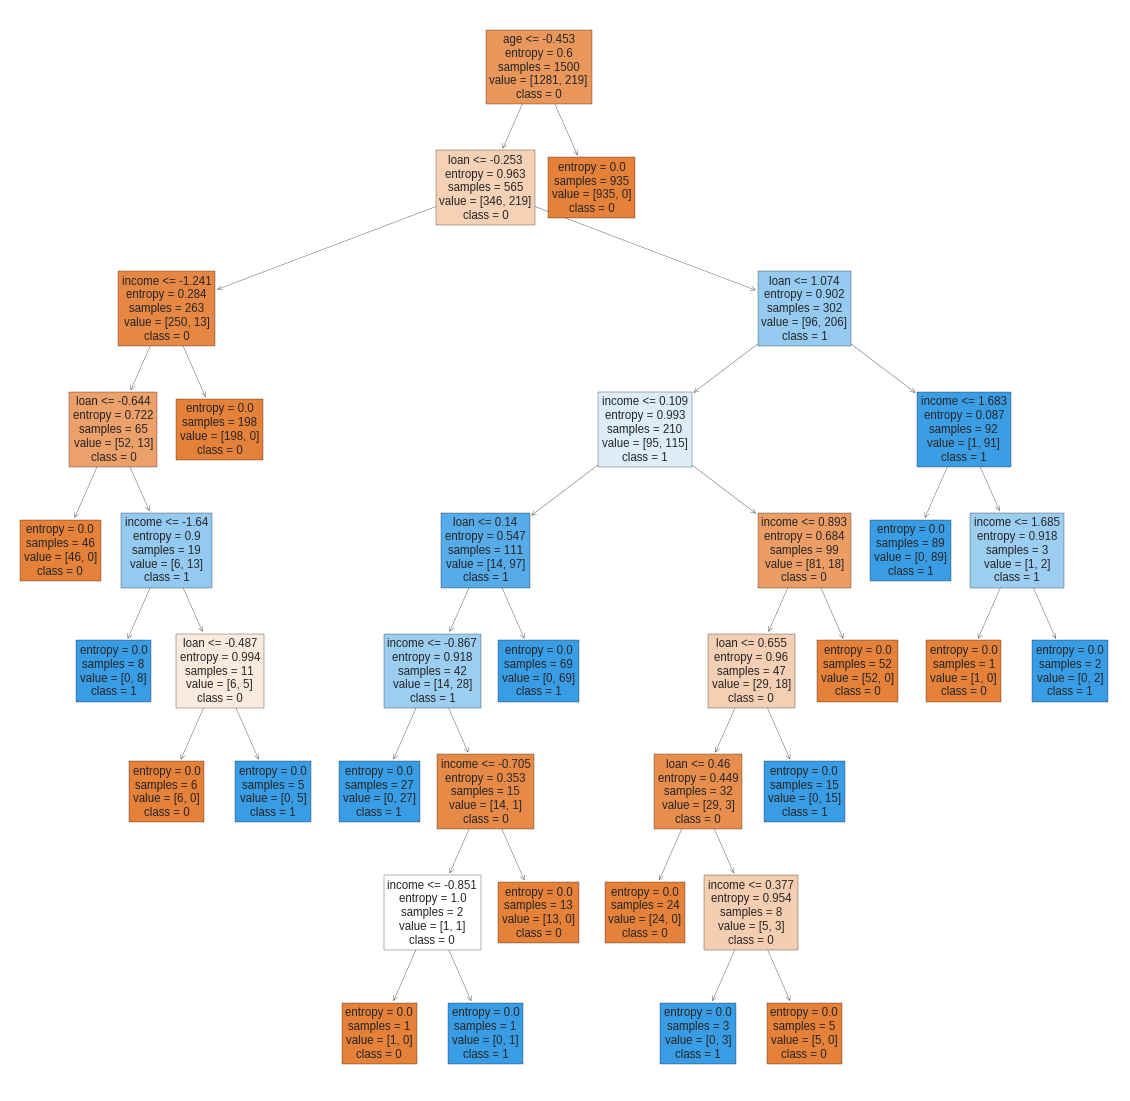

In [36]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names = previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

#**Base Census**

In [43]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [44]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [45]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

In [46]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state= 0)
arvore_census.fit(X_census_treinamento, Y_census_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [49]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [51]:
accuracy_score(Y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

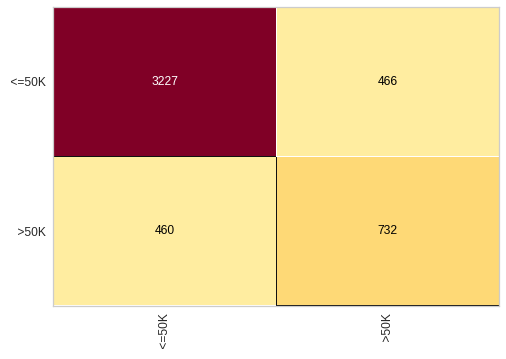

In [52]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [53]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

